<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <p>Docente: Rodrigo Del Rosso<p>
    <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
    <p>Integrantes: Cerutti, Garcia Rio, Levit, Marchetta <p>
</div>

# Lectura y preparacion de los datos  <br>


In [ ]:
# Modulos a instalar
!pip install pmdarima
!pip install arch
!pip install pystan
!pip install darts

!pip install prophet


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.api as sm
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.statistics import check_seasonality, plot_acf
from darts.metrics import mape

import prophet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/Poblacion.csv", sep=";")
df


,Year,Pais,Hombres,Mujeres,Población
0,2021,Argentina,22.678.199,23.130.548,45.808.747
1,2020,Argentina,22.465.694,22.911.069,45.376.763
2,2019,Argentina,22.249.019,22.689.693,44.939.000
3,2018,Argentina,22.027.014,22.467.488,44.495.000
4,2017,Argentina,21.800.696,22.244.116,44.045.000
5,2016,Argentina,21.571.303,22.019.065,43.590.000
6,2015,Argentina,21.340.426,21.791.541,43.132.000
7,2014,Argentina,21.106.519,21.562.981,42.670.000
8,2013,Argentina,20.870.445,21.332.490,42.203.000
9,2012,Argentina,20.634.269,21.099.001,41.733.000


In [ ]:
df.head()

,Year,Pais,Hombres,Mujeres,Población
0,2021,Argentina,22.678.199,23.130.548,45.808.747
1,2020,Argentina,22.465.694,22.911.069,45.376.763
2,2019,Argentina,22.249.019,22.689.693,44.939.000
3,2018,Argentina,22.027.014,22.467.488,44.495.000
4,2017,Argentina,21.800.696,22.244.116,44.045.000


In [ ]:
cols = ['Year', 'Población']
df = df.loc[:, cols]
df.head()

,Year,Población
0,2021,45.808.747
1,2020,45.376.763
2,2019,44.939.000
3,2018,44.495.000
4,2017,44.045.000


In [ ]:
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#df.set_index("Year", inplace=True)

df.head()

,Year,Población
0,2021,45.808.747
1,2020,45.376.763
2,2019,44.939.000
3,2018,44.495.000
4,2017,44.045.000


In [ ]:
df.dtypes

Year          int64
Población    object
dtype: object

In [ ]:
df['Población'] = df['Población'].str.replace('.', '').astype(float)

<ipython-input-20-092171f8bfda>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Población'] = df['Población'].str.replace('.', '').astype(float)


# Modelos

###### Division del dataset

In [ ]:
df.head()

,Year,Población
0,2021,45808747.0
1,2020,45376763.0
2,2019,44939000.0
3,2018,44495000.0
4,2017,44045000.0


In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
df.dtypes

Year           int64
Población    float64
dtype: object

###### Darts

In [ ]:
# Importar librerías necesarias de Darts
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.statistics import check_seasonality
from darts.metrics import mape
from darts.metrics import mae
from darts.metrics import mse
from darts.metrics import rmse
import matplotlib.pyplot as plt

# Crear la serie temporal de Darts
series = TimeSeries.from_dataframe(df,"Year","Población")

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Configurar y entrenar el modelo NBEATS
model = NBEATSModel(input_chunk_length=10, output_chunk_length=5, n_epochs=100)
model.fit(train, verbose=True)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(len(test))

# Calcular métrica de interés (MAPE en este caso)
mape_score_dart = mape(test, predictions)
mse_score_dart= mse(test, predictions)
mae_score_dart = mae(test, predictions)
rmse_score_dart= rmse(test, predictions)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.3 K     Non-trainable params
6.1 M     Total params
24.342    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
mape_score_dart

2.0599282478929637

In [ ]:
mse_score_dart

953130086836.7113

In [ ]:
mae_score_dart

904519.7418743465

In [ ]:
rmse_score_dart

976283.8146956607

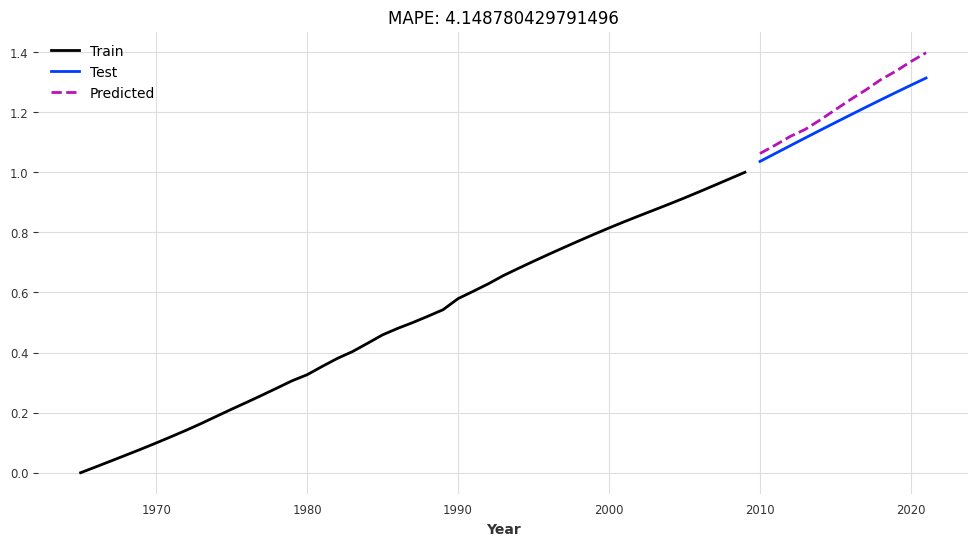

In [ ]:
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
predictions_scaled = scaler.transform(predictions)

# Graficar las series de tiempo
plt.figure(figsize=(12, 6))
train_scaled.plot(label='Train', lw=2)
test_scaled.plot(label='Test', lw=2)
predictions_scaled.plot(label='Predicted', lw=2, linestyle='--')
plt.title(f'MAPE: {mape(test_scaled,predictions_scaled)}')
plt.legend()
plt.show()

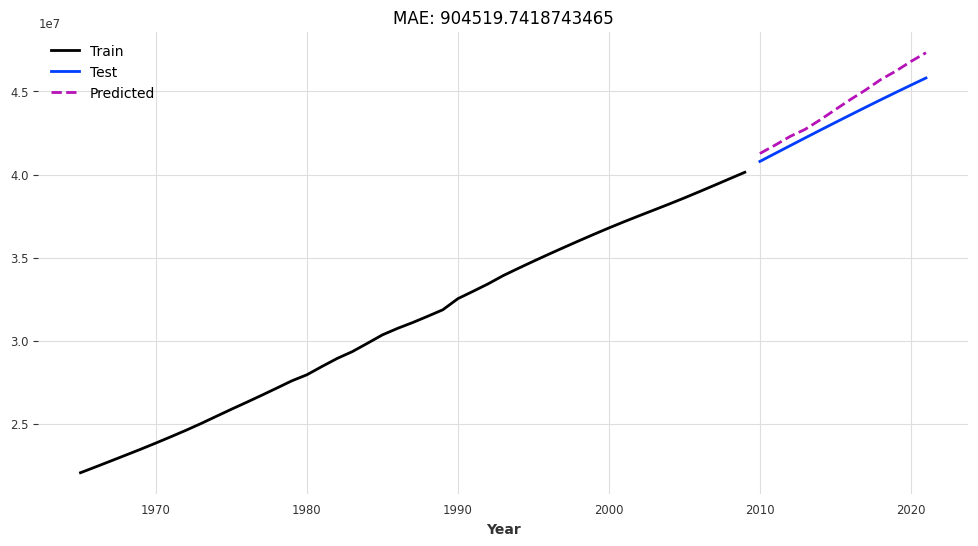

In [ ]:
#Graficar las series de tiempo
plt.figure(figsize=(12, 6))
train.plot(label='Train', lw=2)
test.plot(label='Test', lw=2)
predictions.plot(label='Predicted', lw=2, linestyle='--')
plt.title(f'MAE: {mae_score_dart}')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


###### Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4478_1p/t16oqu34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc4478_1p/pzw65pt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13155', 'data', 'file=/tmp/tmpc4478_1p/t16oqu34.json', 'init=/tmp/tmpc4478_1p/pzw65pt9.json', 'output', 'file=/tmp/tmpc4478_1p/prophet_modelxnitkeo8/prophet_model-20231201195506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:55:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


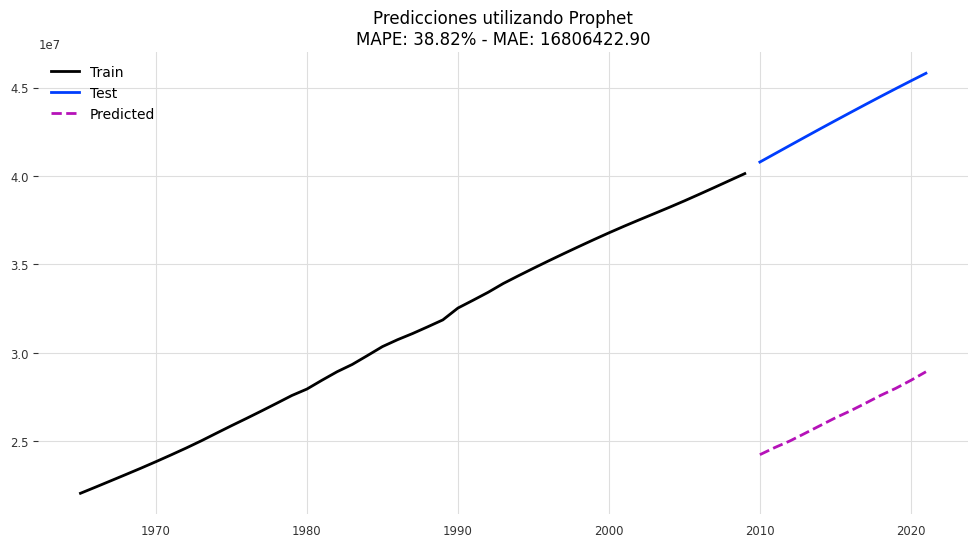

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Convertir la serie temporal de Darts a un DataFrame de pandas
prophet_df = pd.DataFrame({'ds': train.pd_dataframe().index, 'y': train.pd_dataframe().values.flatten()})

# Configurar y entrenar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(prophet_df)

# Crear un DataFrame con las fechas futuras para las predicciones
future = model_prophet.make_future_dataframe(periods=len(test), freq='Y')

# Realizar las predicciones
forecast = model_prophet.predict(future)

# Calcular el MAPE y MAE
mape_score_prophet = mean_absolute_percentage_error(test.pd_dataframe().values, forecast[-len(test):]['yhat'].values)
mae_score_prophet = mean_absolute_error(test.pd_dataframe().values, forecast[-len(test):]['yhat'].values)

# Visualizar las series de tiempo de entrenamiento, prueba y predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.pd_dataframe().index, train.pd_dataframe().values, label='Train', lw=2)
plt.plot(test.pd_dataframe().index, test.pd_dataframe().values, label='Test', lw=2)
plt.plot(test.pd_dataframe().index, forecast[-len(test):]['yhat'].values, label='Predicted', lw=2, linestyle='--')
plt.title(f'Predicciones utilizando Prophet\nMAPE: {mape_score_prophet:.2%} - MAE: {mae_score_prophet:.2f}')
plt.legend()
plt.show()



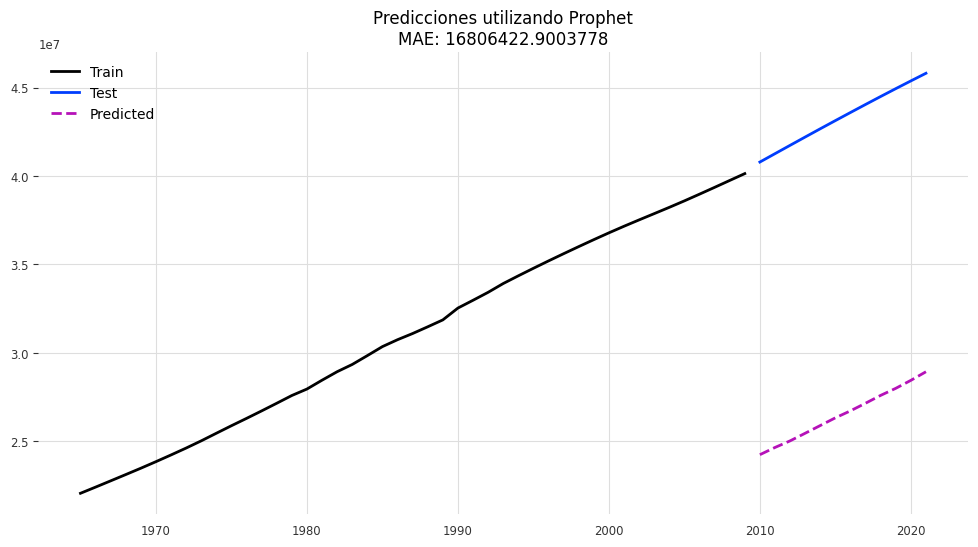

In [ ]:
# Visualizar las series de tiempo de entrenamiento, prueba y predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.pd_dataframe().index, train.pd_dataframe().values, label='Train', lw=2)
plt.plot(test.pd_dataframe().index, test.pd_dataframe().values, label='Test', lw=2)
plt.plot(test.pd_dataframe().index, forecast[-len(test):]['yhat'].values, label='Predicted', lw=2, linestyle='--')
plt.title(f'Predicciones utilizando Prophet\nMAE: {mae_score_prophet}')
plt.legend()
plt.show()

###### Redes Neuronales

In [ ]:
!pip install tensorflow


1/1 [==============================] - 2s 2s/step

1/1 [==============================] - 3s 3s/step

1/1 [==============================] - 1s 790ms/step

1/1 [==============================] - 1s 797ms/step

 40%|████      | 4/10 [00:58<01:16, 12.70s/trial, best loss: 0.006584252246791057]

1/1 [==============================] - 1s 1s/step

 50%|█████     | 5/10 [01:05<00:53, 10.64s/trial, best loss: 0.006270263936095116]

1/1 [==============================] - 1s 819ms/step

1/1 [==============================] - 1s 866ms/step

1/1 [==============================] - 1s 817ms/step

1/1 [==============================] - 1s 812ms/step

1/1 [==============================] - 1s 1s/step

100%|██████████| 10/10 [01:47<00:00, 10.75s/trial, best loss: 0.0033183398072556634]
Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.3494
Epoch 2/150
1/1 [==============================] - 0s 16ms/step - loss: 0.3301
Epoch 3/150
1/1 [==============================] - 0s 19ms/step - loss: 0.3071
Epoch 4/150
1/1 [==============================] - 0s 18ms/step - loss: 0.2871
Epoch 5/150
1/1 [==============================] - 0s 20ms/step - loss: 0.2691
Epoch 6/150
1/1 [==============================] - 0s 15ms/step - loss: 0.2483
Epoch 7/150
1/1 [==============================] - 0s 16ms/step - loss: 0.2292
Epoch 8/150
1/1 [==============================] - 0s 16ms/step - loss: 0.2067
Epoch 9/150
1/1 [=

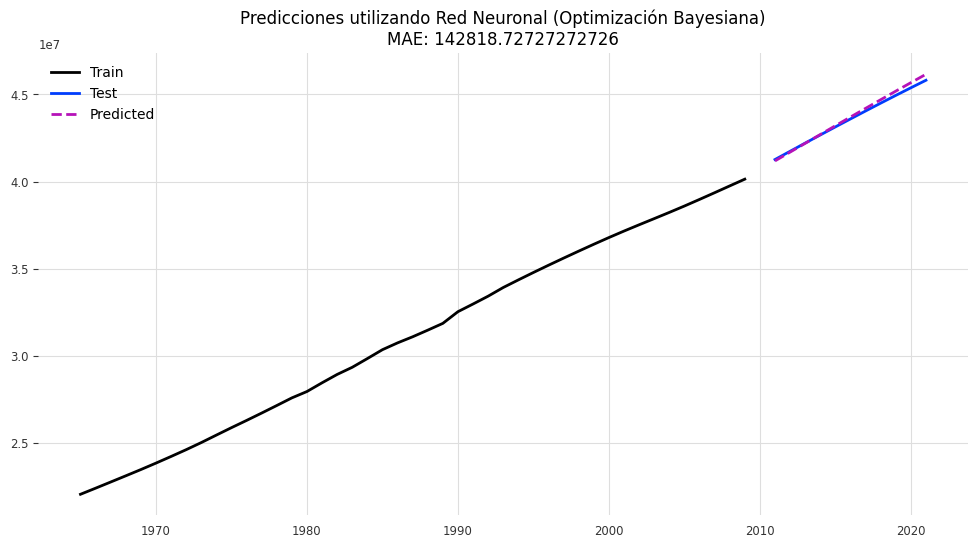

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from hyperopt import fmin, tpe, hp

# Escalar los datos
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.pd_dataframe().values.reshape(-1, 1))
test_scaled = scaler.transform(test.pd_dataframe().values.reshape(-1, 1))

# Preparar los datos para LSTM
def prepare_lstm_data(data, lags):
    X, y = [], []
    for i in range(len(data)-lags):
        X.append(data[i:(i+lags), 0])
        y.append(data[i+lags, 0])
    return np.array(X), np.array(y)

lags = 1

X_train, y_train = prepare_lstm_data(train_scaled, lags)
X_test, y_test = prepare_lstm_data(test_scaled, lags)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Definir el espacio de búsqueda de hiperparámetros
space = {
    'units_lstm1': hp.choice('units_lstm1', [50, 100]),
    'units_lstm2': hp.choice('units_lstm2', [50, 100]),
    'dense_units': hp.choice('dense_units', [50, 100]),
    'dropout_lstm1': hp.uniform('dropout_lstm1', 0, 0.5),
    'dropout_lstm2': hp.uniform('dropout_lstm2', 0, 0.5),
    'dropout_dense': hp.uniform('dropout_dense', 0, 0.5),
    'epochs': hp.choice('epochs', [50, 100, 150]),
    'batch_size': hp.choice('batch_size', [32, 64])
}

# Función objetivo para la optimización
def objective(params):
    model_nn = Sequential([
        LSTM(units=params['units_lstm1'], return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(params['dropout_lstm1']),
        LSTM(units=params['units_lstm2']),
        Dropout(params['dropout_lstm2']),
        Dense(units=params['dense_units']),
        Dropout(params['dropout_dense']),
        Dense(units=1)
    ])

    model_nn.compile(optimizer='adam', loss='mean_squared_error')

    model_nn.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    predictions_scaled = model_nn.predict(X_test)
    predictions = scaler.inverse_transform(predictions_scaled)

    mape_score = mean_absolute_error(test.pd_dataframe().values[lags:], predictions) / test.pd_dataframe().values[lags:].mean()

    return mape_score

# Realizar la optimización bayesiana
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

# Obtener los mejores hiperparámetros
best_units_lstm1 = [50, 100][best['units_lstm1']]
best_units_lstm2 = [50, 100][best['units_lstm2']]
best_dense_units = [50, 100][best['dense_units']]
best_dropout_lstm1 = best['dropout_lstm1']
best_dropout_lstm2 = best['dropout_lstm2']
best_dropout_dense = best['dropout_dense']
best_epochs = [50, 100, 150][best['epochs']]
best_batch_size = [32, 64][best['batch_size']]

# Entrenar el modelo con los mejores hiperparámetros
best_model_nn = Sequential([
    LSTM(units=best_units_lstm1, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(best_dropout_lstm1),
    LSTM(units=best_units_lstm2),
    Dropout(best_dropout_lstm2),
    Dense(units=best_dense_units),
    Dropout(best_dropout_dense),
    Dense(units=1)
])

best_model_nn.compile(optimizer='adam', loss='mean_squared_error')
best_model_nn.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, verbose=1)

# Realizar predicciones en el conjunto de prueba
best_predictions_scaled = best_model_nn.predict(X_test)
best_predictions = scaler.inverse_transform(best_predictions_scaled)

#Calcular el MAPE
best_mae_score_rd = mean_absolute_error(test.pd_dataframe().values[lags:], best_predictions)

# Visualizar las series de tiempo
plt.figure(figsize=(12, 6))
plt.plot(train.pd_dataframe().index, train.pd_dataframe().values, label='Train', lw=2)
plt.plot(test.pd_dataframe().index[lags:], test.pd_dataframe().values[lags:], label='Test', lw=2)
plt.plot(test.pd_dataframe().index[lags:], best_predictions, label='Predicted', lw=2, linestyle='--')
plt.title(f'Predicciones utilizando Red Neuronal (Optimización Bayesiana)\nMAE: {best_mae_score_rd}')
plt.legend()
plt.show()


###### SVM

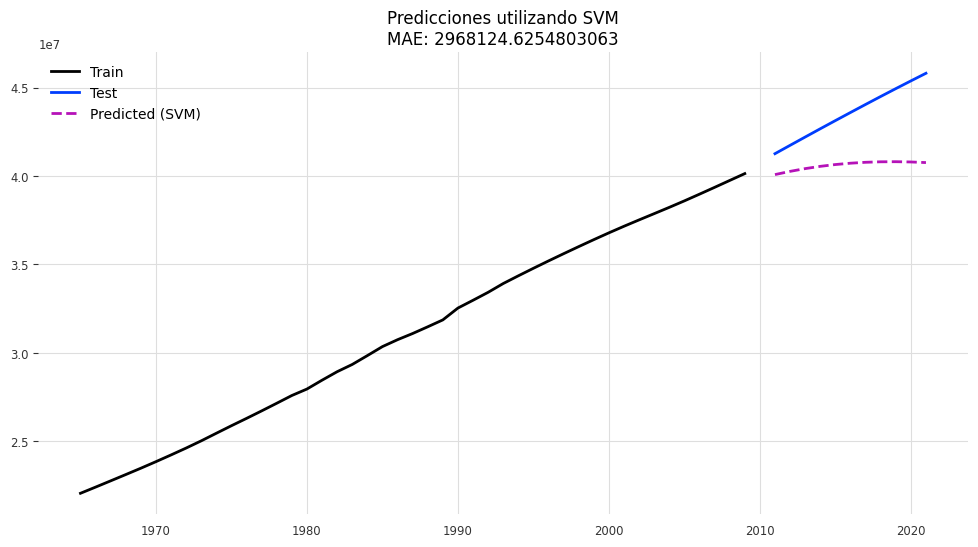

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler_svm = StandardScaler()
train_scaled_svm = scaler_svm.fit_transform(train.pd_dataframe().values.reshape(-1, 1))
test_scaled_svm = scaler_svm.transform(test.pd_dataframe().values.reshape(-1, 1))

# Preparar los datos para SVM
def prepare_svm_data(data, lags):
    X, y = [], []
    for i in range(len(data)-lags):
        X.append(data[i:(i+lags), 0])
        y.append(data[i+lags, 0])
    return np.array(X), np.array(y)

lags_svm = 1

X_train_svm, y_train_svm = prepare_svm_data(train_scaled_svm, lags_svm)
X_test_svm, y_test_svm = prepare_svm_data(test_scaled_svm, lags_svm)

# Crear y entrenar el modelo SVM
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_model.fit(X_train_svm, y_train_svm)

# Hacer predicciones en el conjunto de prueba
predictions_svm_scaled = svm_model.predict(X_test_svm)
predictions_svm = scaler_svm.inverse_transform(predictions_svm_scaled.reshape(-1, 1))

# Calcular el MAPE
mae_score_svm = mean_absolute_error(test.pd_dataframe().values[lags_svm:], predictions_svm)

# Visualizar las series de tiempo
plt.figure(figsize=(12, 6))
plt.plot(train.pd_dataframe().index, train.pd_dataframe().values, label='Train', lw=2)
plt.plot(test.pd_dataframe().index[lags_svm:], test.pd_dataframe().values[lags_svm:], label='Test', lw=2)
plt.plot(test.pd_dataframe().index[lags_svm:], predictions_svm, label='Predicted (SVM)', lw=2, linestyle='--')
plt.title(f'Predicciones utilizando SVM\nMAE: {mae_score_svm}')
plt.legend()
plt.show()


# Predicciones futuras

Dado que el modelo de menor MAPE (Mean Absolute Percentage Error) es el generado mediante la red neuronal, procedemos a utilizarlo para pronosticar datos futuros no presentens en el conjunto de datos:

1/1 [==============================] - 0s 42ms/step


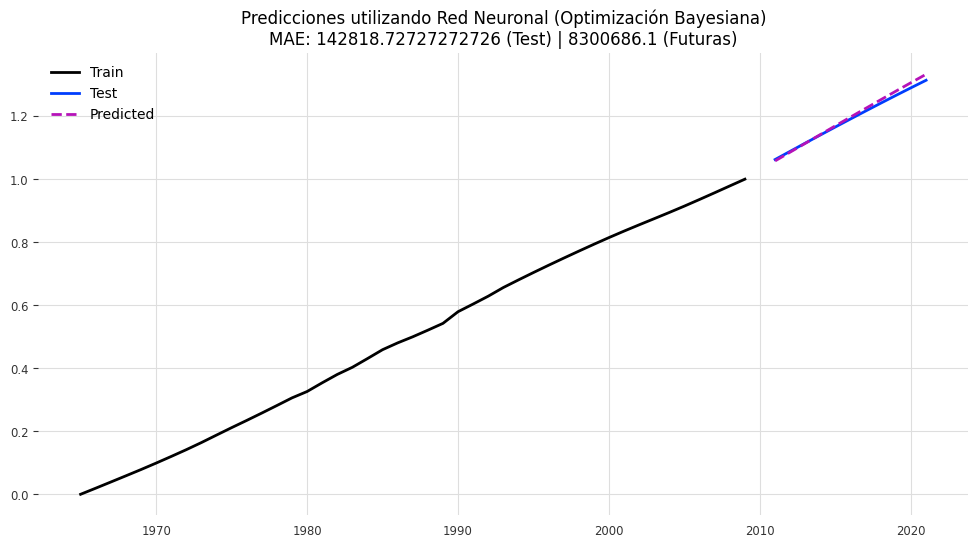

In [ ]:
# Obtener las fechas para las predicciones futuras (ahora con frecuencia anual)
last_index_value = test.pd_dataframe().index[-1]
future_dates = pd.date_range(start=f"{last_index_value + 1}-01-01", periods=10, freq='A')
future_index = pd.DatetimeIndex(future_dates)

# Preparar datos para predicción
X_pred, y_pred = prepare_lstm_data(test_scaled, lags)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

# Realizar predicciones para las próximas 10 observaciones
future_predictions_scaled = []
last_observation_scaled = X_pred[-1]

for _ in range(10):
    # Reshape la última observación para que tenga la forma adecuada
    last_observation_reshaped = np.reshape(last_observation_scaled, (1, lags, 1))

    # Realizar predicción
    next_prediction_scaled = best_model_nn.predict(last_observation_reshaped)

    # Agregar la predicción a la lista de predicciones futuras
    future_predictions_scaled.append(next_prediction_scaled[0, 0])

    # Actualizar la última observación con la nueva predicción
    last_observation_scaled = np.roll(last_observation_scaled, -1)
    last_observation_scaled[-1] = next_prediction_scaled

# Invertir las predicciones futuras utilizando el escalador
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# Calcular el MAPE para las predicciones futuras
future_mae_score = mean_absolute_error(test.pd_dataframe().values[lags: lags + 10], future_predictions[:10])

# Normalizar todas las series para que estén en la misma escala
train_scaled_normalized = scaler.transform(train.pd_dataframe().values.reshape(-1, 1))
test_scaled_normalized = scaler.transform(test.pd_dataframe().values.reshape(-1, 1))
best_predictions_normalized = scaler.transform(best_predictions)
future_predictions_normalized = scaler.transform(future_predictions)

# Visualizar las series de tiempo extendidas con las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(train.pd_dataframe().index, train_scaled_normalized, label='Train', lw=2)
plt.plot(test.pd_dataframe().index[lags:], test_scaled_normalized[lags:], label='Test', lw=2)
plt.plot(test.pd_dataframe().index[lags:], best_predictions_normalized, label='Predicted', lw=2, linestyle='--')

plt.title(f'Predicciones utilizando Red Neuronal (Optimización Bayesiana)\nMAE: {best_mae_score_rd} (Test) | {future_mae_score} (Futuras)')
plt.legend()
plt.show()



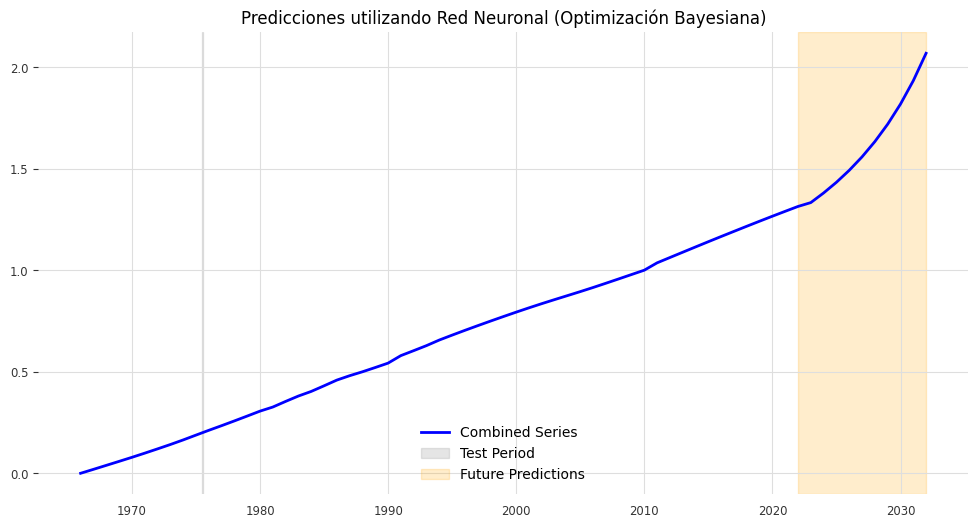

In [ ]:
initial_index_value = train.pd_dataframe().index[0]
initial_date = pd.date_range(start=f"{initial_index_value}-01-01", periods=1, freq='A')
initial_index = pd.DatetimeIndex(initial_date)

# Normalizar todas las series para que estén en la misma escala
train_scaled_normalized = scaler.transform(train.pd_dataframe().values.reshape(-1, 1))
test_scaled_normalized = scaler.transform(test.pd_dataframe().values.reshape(-1, 1))
future_predictions_normalized = scaler.transform(future_predictions)

# Combinar las series de tiempo de entrenamiento y prueba en una única serie continua
combined_series_normalized = np.concatenate([train_scaled_normalized, test_scaled_normalized, future_predictions_normalized])

# Crear un índice continuo para la serie combinada
combined_index = pd.date_range(start=initial_index[0], periods=len(combined_series_normalized), freq='A')

# Obtener las fechas de inicio y fin del período de prueba y las predicciones futuras
test_start = test.pd_dataframe().index[0]
test_end = test.pd_dataframe().index[-1]
future_start = combined_index[-11]
future_end = combined_index[-1]

# Visualizar la serie continua con colores diferentes para entrenamiento, prueba y predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(combined_index, combined_series_normalized, label='Combined Series', lw=2, color='blue')

# Resaltar el período de prueba con un color diferente
plt.axvspan(test_start, test_end, color='gray', alpha=0.2, label='Test Period')

# Resaltar las predicciones futuras con otro color
plt.axvspan(future_start, future_end, color='orange', alpha=0.2, label='Future Predictions')

plt.title(f'Predicciones utilizando Red Neuronal (Optimización Bayesiana)')
plt.legend()
plt.show()


Auto ML


In [ ]:
#H2O
# Importar bibliotecas necesarias
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

# Inicializar H2O
h2o.init()

# Convertir tu serie temporal a un DataFrame de pandas
df = df.reset_index()

# Inicializar un objeto H2OFrame
h2o_df = h2o.H2OFrame(df)

# Definir las columnas predictoras y la variable objetivo
x = list(df.columns[:-1])  # Convertir el Index a una lista
y = df.columns[-1]   # La última columna (variable objetivo)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_size_h2o = int(len(h2o_df) * 0.8)
train_h2o, test_h2o = h2o_df[:train_size_h2o, :], h2o_df[train_size_h2o:, :]

# Configurar y entrenar AutoML
aml = H2OAutoML(max_runtime_secs=600)  # Establecer el tiempo máximo de ejecución en segundos
aml.train(x=x, y=y, training_frame=train_h2o)

# Ver los resultados del AutoML
lb = aml.leaderboard
print(lb)

# Seleccionar el mejor modelo del AutoML
best_model = aml.leader

# Hacer predicciones en el conjunto de prueba
predictions_h2o = best_model.predict(test_h2o)

# Convertir las predicciones a un DataFrame de pandas
predictions_df = h2o.as_list(predictions_h2o)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=2ce7c5e84dcdfa2824634d6a394433feb6d082302c32b71283000dbe2f7284f9
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7pebaa50
  JVM stdout: /tmp/tmp7pebaa50/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7pebaa50/h2o_unknownUser_started

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_un54m3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
20:00:48.355: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 45.0.

█████████████████████████████████████████████████████████████| (done) 100%
model_id                                         rmse          mse       mae       rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20231201_200040_model_298  101031  1.02072e+10   48317.8  0.00306274               1.02072e+10
GBM_grid_1_AutoML_1_20231201_200040_model_224  102161  1.04369e+10   49507.7  0.00309786               1.04369e+10
GBM_grid_1_AutoML_1_20231201_200040_model_379  111934  1.25292e+10   75568.4  0.00335255               1.25292e+10
GBM_grid_1_AutoML_1_20231201_200040_model_250  125611  1.57781e+10   93539.7  0.00374814               1.57781e+10
GBM_grid_1_AutoML_1_20231201_200040_model_325  125752  1.58135e+10   88940    0.0

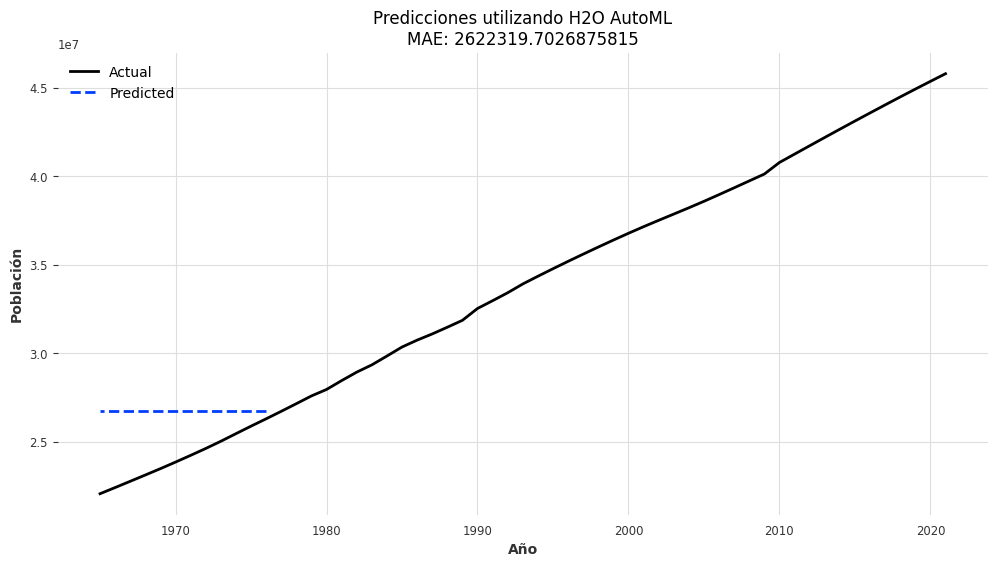

In [ ]:
mae_h2o = mean_absolute_error(test_h2o[y].as_data_frame().values, predictions_df.values)

# Visualizar las predicciones
#plt.figure(figsize=(12, 6))
#plt.plot(df['Year'][train_size_h2o:], df['Población'][train_size_h2o:], label='Test', lw=2)
#plt.plot(df['Year'][train_size_h2o:], predictions_df.values, label='Predicted', lw=2, linestyle='--')
#plt.title(f'Predicciones utilizando H2O AutoML\nMAPE: {mape_h2o:.2%}')
#plt.xlabel('Año')
#plt.ylabel('Población')
#plt.legend()
#plt.show()

#nuevo codigo para graficar
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Población'], label='Actual', lw=2)
plt.plot(df['Year'][train_size_h2o:], predictions_df.values, label='Predicted', lw=2, linestyle='--')
plt.title(f'Predicciones utilizando H2O AutoML\nMAE: {mae_h2o}')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()




In [ ]:
# Obtener información sobre el modelo seleccionado
print(f"Modelo Seleccionado: {best_model.algo}")

# Otras propiedades del modelo
print(f"Parámetros del Modelo: {best_model.params}")
print(f"Tipo de Modelo: {best_model.model_id}")


Modelo Seleccionado: gbm
Parámetros del Modelo: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_1_20231201_200040_model_298', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_1_20231201_200040_model_298'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231201_200040_training_py_1_sid_8afa', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231201_200040_training_py_1_sid_8afa'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231201_200040_training_py_1_sid_8afa', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231201_200040_training_py_1_sid_8afa'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 

Podemos observar que el modelo seleccionado por Auto ML con esta libreria, fue un gbm que predice una constante.

In [ ]:
# Apagar H2O
h2o.shutdown()

H2O session _sid_8afa closed.


<ipython-input-46-b68b04c51667>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


PYCARET

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from pycaret.time_series import *


# Leer datos y convertir a formato de series temporal de sktime
df = pd.read_csv("/content/Poblacion2.csv", sep=";")
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Ordenar DataFrame por la columna 'Year' de menor a mayor
df.sort_values(by='Year', inplace=True)
df.set_index("Year", inplace=True)


# Verificar la frecuencia de la columna de fechas
frecuencia = df.index.freq
print(f"Frecuencia de la columna de fechas: {frecuencia}")


df_series = pd.Series(df['Población'].values, index=df.index)

# Configurar el entorno de Pycaret con validación cruzada de series temporales
exp = setup(data=df_series, session_id=123, fold_strategy='sliding', fold=5)

# Comparar modelos de series temporales
best_model = compare_models()

# Resumen del modelo seleccionado
print(f"Modelo Seleccionado: {best_model}")

# Obtener detalles del modelo seleccionado
model_details = pull()

# Hacer predicciones en el conjunto de prueba
predictions = predict_model(best_model)



Frecuencia de la columna de fechas: None


,Description,Value
0,session_id,123
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(57, 1)"
5,Transformed data shape,"(57, 1)"
6,Transformed train set shape,"(56, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ets,ETS,0.0259,0.0256,11049.9843,11049.9843,0.0002,0.0002,0.0600
exp_smooth,Exponential Smoothing,0.0261,0.0258,11125.4451,11125.4451,0.0002,0.0002,0.0440
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0465,0.0460,19797.8194,19797.8194,0.0004,0.0004,0.2960
auto_arima,Auto ARIMA,0.0550,0.0544,23343.7600,23343.7600,0.0005,0.0005,0.9520
theta,Theta Forecaster,0.0557,0.0551,23657.7291,23657.7291,0.0005,0.0005,0.0500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0769,0.0759,32499.1687,32499.1687,0.0007,0.0007,0.2220
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0822,0.0813,34861.4089,34861.4089,0.0008,0.0008,0.2480
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0823,0.0813,34937.7808,34937.7808,0.0008,0.0008,0.1060
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0865,0.0855,36751.6119,36751.6119,0.0008,0.0008,0.2100
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.0865,0.0855,36751.6119,36751.6119,0.0008,0.0008,0.0920


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

Modelo Seleccionado: AutoETS(trend='add')


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,ETS,0.0412,0.0407,17453.1887,17453.1887,0.0004,0.0004


In [ ]:
# compare models using OOP
best = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ets,ETS,0.0259,0.0256,11049.9843,11049.9843,0.0002,0.0002,0.0600
exp_smooth,Exponential Smoothing,0.0261,0.0258,11125.4451,11125.4451,0.0002,0.0002,0.0420
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0465,0.0460,19797.8194,19797.8194,0.0004,0.0004,0.1940
auto_arima,Auto ARIMA,0.0550,0.0544,23343.7600,23343.7600,0.0005,0.0005,0.3220
theta,Theta Forecaster,0.0557,0.0551,23657.7291,23657.7291,0.0005,0.0005,0.0500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0769,0.0759,32499.1687,32499.1687,0.0007,0.0007,0.2120
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0822,0.0813,34861.4089,34861.4089,0.0008,0.0008,0.2440
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0823,0.0813,34937.7808,34937.7808,0.0008,0.0008,0.1020
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0865,0.0855,36751.6119,36751.6119,0.0008,0.0008,0.0960
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.0865,0.0855,36751.6119,36751.6119,0.0008,0.0008,0.1020


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
# plot forecast
plot_model(best, plot = 'forecast')

In [ ]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 15})

El modelo seleccionado por la libreria pycaret, es un validar!!!

In [ ]:
# residuals plot
plot_model(best, plot = 'residuals')